In [2]:
import pandas as pd 
def load_data():
    url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
    html = pd.read_html(url, header = 0)
    df = html[0]
    return df

In [31]:
df = load_data()
df

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [4]:
sector_unique = df["GICS Sector"].unique()
sector_unique

array(['Industrials', 'Health Care', 'Information Technology',
       'Utilities', 'Financials', 'Materials', 'Consumer Discretionary',
       'Real Estate', 'Communication Services', 'Consumer Staples',
       'Energy'], dtype=object)

In [5]:
len(sector_unique)

11

# Group By Sector

In [7]:
sector = df.groupby("GICS Sector")

In [8]:
sector.first(11)

,CIK
GICS Sector,
Communication Services,1652044
Consumer Discretionary,1559720
Consumer Staples,764180
Energy,1841666
Financials,4977
Health Care,1800
Industrials,66740
Information Technology,1467373
Materials,2969


In [9]:
sector.describe()

CIK                                                   \
                       count          mean            std      min        25%   
GICS Sector                                                                     
Communication Services  22.0  1.150190e+06  503816.763824  29989.0  833146.75   
Consumer Discretionary  53.0  9.107181e+05  450123.335232  37996.0  789570.00   
Consumer Staples        38.0  4.932800e+05  659308.763424   7084.0   27947.75   
Energy                  23.0  8.423255e+05  640873.249366   4447.0   97594.00   
Financials              72.0  6.995565e+05  541271.213557   4962.0   77742.50   
Health Care             64.0  8.291735e+05  536818.082023   1800.0  312903.00   
Industrials             78.0  7.025712e+05  617143.943209   4281.0   76590.50   
Information Technology  64.0  8.721607e+05  491486.090775   2488.0  742719.50   
Materials               28.0  8.372840e+05  699283.185676   2969.0   67840.25   
Real Estate             31.0  9.564368e+05  373794.645688  34903.0  892604.00   
Utilities               30.0  8.457124e+05  460276.348204   4904.0  737178.50   

                                                          
                              50%         75%        max  
GICS Sector                                               
Communication Services  1225195.0  1564708.00  1754301.0  
Consumer Discretionary   940944.0  1174922.00  1590895.0  
Consumer Staples          78950.0   929235.25  1996862.0  
Energy                  1035002.0  1447738.50  1841666.0  
Financials               852883.5  1137113.25  1633917.0  
Health Care              883910.0  1103212.25  1932393.0  
Industrials              737525.0  1122747.50  1967680.0  
Information Technology   883038.0  1265152.75  1730168.0  
Materials                915994.5  1419355.00  1755672.0  
Real Estate             1034054.0  1067255.50  1705696.0  
Utilities                898492.5  1043948.50  1868275.0

In [11]:
sector.get_group("Health Care")

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
9,A,Agilent Technologies,Health Care,Life Sciences Tools & Services,"Santa Clara, California",2000-06-05,1090872,1999
15,ALGN,Align Technology,Health Care,Health Care Supplies,"Tempe, Arizona",2017-06-19,1097149,1997
33,AMGN,Amgen,Health Care,Biotechnology,"Thousand Oaks, California",1992-01-02,318154,1980
...,...,...,...,...,...,...,...,...
472,VTRS,Viatris,Health Care,Pharmaceuticals,"Pittsburgh, Pennsylvania",2004-04-23,1792044,1961
483,WAT,Waters Corporation,Health Care,Life Sciences Tools & Services,"Milford, Massachusetts",2002-01-02,1000697,1958
487,WST,West Pharmaceutical Services,Health Care,Health Care Supplies,"Exton, Pennsylvania",2020-05-22,105770,1923
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


# Finance Data

In [13]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [14]:
import yfinance as yf


# List Of S&P 500 Symbols

In [15]:
list(df.Symbol)

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BK',
 'BBWI',
 'BAX',
 'BDX',
 'BRK.B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'BLDR',
 'BG',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'COR',
 'CNC',
 'CNP',
 'CDAY',
 'CF',
 'CHRW',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA

In [16]:
# https://pypi.org/project/yfinance/


data = yf.download(# or pdr.get_data_yahoo(... tickers list or string as well)
tickers = list(df.Symbol),


# use "period instead of start/end"
#valid periods: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y,5y,10y, ytd, max
#(optional, default is "1mo")
period = "ytd",

#fetch data by interval (including intraday if period < 60 days)
#valid intervals: 1m, 2m, 5, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo
#(optional, default is "1mo")
interval = "1d",

#group by ticker (to access via data"SPY")
#(optional, default is "column")
group_by = "ticker",
    
#adjust all OHLC automatically
#(optional, default is False)
auto_adjust = True,
    
#download pre/post regular market hours data
#(optional, default is False)
prepost = True,

#use threads for mass downloading? (True False Integer)
#(optional, default is True)
threads = True,
    
#proxy URL scheme use use when downloading ? 
# (optional, defualt is None)
proxy = None

)


[*********************100%%**********************]  503 of 503 completed

2 Failed downloads:
['BRK.B']: Exception('%ticker%: No data found, symbol may be delisted')
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (period=ytd)')


In [18]:
data #data"AAPL

IDXX                                              \
                  Open        High         Low       Close  Volume   
Date                                                                 
2024-01-02  548.400024  554.919983  542.000000  547.690002  384500   
2024-01-03  546.729980  546.729980  529.250000  535.059998  417900   
2024-01-04  530.450012  540.890015  530.450012  538.500000  377500   
2024-01-05  537.979980  541.400024  535.440002  537.359985  387500   
2024-01-08  540.880005  545.630005  537.669983  543.960022  442200   
2024-01-09  535.969971  555.340027  535.969971  553.039978  409400   
2024-01-10  552.080017  555.359985  548.489990  554.239990  424700   
2024-01-11  551.580017  559.710022  546.049988  558.710022  463800   
2024-01-12  563.000000  564.799988  534.830017  535.289978  624900   
2024-01-16  533.690002  536.500000  519.520020  520.000000  817100   
2024-01-17  516.229980  520.039978  507.609985  515.479980  753500   
2024-01-18  515.909973  525.760010  515.500000  525.280029  696200   
2024-01-19  525.229980  525.510010  513.330017  523.820007  443000   
2024-01-22  525.909973  537.849976  525.909973  531.429993  449000   
2024-01-23  533.729980  534.979980  524.000000  531.520020  293700   

                  GOOG                                                ...  \
                  Open        High         Low       Close    Volume  ...   
Date                                                                  ...   
2024-01-02  139.600006  140.615005  137.740005  139.559998  20071900  ...   
2024-01-03  138.600006  141.089996  138.429993  140.360001  18974300  ...   
2024-01-04  139.850006  140.634995  138.009995  138.039993  18253300  ...   
2024-01-05  138.352005  138.809998  136.850006  137.389999  15433200  ...   
2024-01-08  138.000000  140.639999  137.880005  140.529999  17645300  ...   
2024-01-09  140.059998  142.800003  139.789993  142.559998  19579700  ...   
2024-01-10  142.520004  144.524994  142.460007  143.800003  16641900  ...   
2024-01-11  144.895004  146.660004  142.214996  143.669998  17471100  ...   
2024-01-12  144.339996  144.740005  143.360001  144.240005  13995200  ...   
2024-01-16  143.429993  145.839996  143.056000  144.080002  19198900  ...   
2024-01-17  142.910004  143.410004  140.509995  142.889999  17884500  ...   
2024-01-18  143.440002  145.585007  143.350006  144.990005  18876800  ...   
2024-01-19  146.304993  148.039993  145.800003  147.970001  27170900  ...   
2024-01-22  148.710007  150.014999  147.580002  147.710007  21829200  ...   
2024-01-23  147.720001  148.860001  147.190002  148.679993  14096600  ...   

                  TSCO                                               \
                  Open        High         Low       Close   Volume   
Date                                                                  
2024-01-02  213.259995  219.660004  212.740005  216.570007  1329400   
2024-01-03  216.479996  216.479996  211.759995  212.649994  1182500   
2024-01-04  212.649994  215.979996  212.649994  215.039993  1250000   
2024-01-05  213.710007  219.589996  213.619995  218.910004  1428900   
2024-01-08  218.199997  223.710007  217.820007  223.529999  1290300   
2024-01-09  222.820007  224.529999  219.789993  220.820007  1347800   
2024-01-10  220.729996  221.399994  219.179993  220.029999  1220400   
2024-01-11  220.059998  221.809998  219.149994  221.589996   912500   
2024-01-12  221.429993  224.020004  219.720001  223.570007  1016200   
2024-01-16  221.979996  224.350006  220.970001  224.270004  1637000   
2024-01-17  220.779999  227.649994  220.779999  227.529999  2313200   
2024-01-18  228.179993  230.860001  226.380005  230.250000  1421000   
2024-01-19  230.559998  233.520004  228.919998  231.059998  1685100   
2024-01-22  231.710007  233.410004  230.440002  232.500000  1586100   
2024-01-23  231.360001  232.130005  226.429993  228.399994  1642500   

                   MRK                                                
                  Op

In [35]:
df2 = pd.DataFrame(data["AAPL"].Close)
df2["Date"] = df2.index
df2

,Close,Date
Date,,
2024-01-02,185.639999,2024-01-02
2024-01-03,184.250000,2024-01-03
2024-01-04,181.910004,2024-01-04
2024-01-05,181.179993,2024-01-05
2024-01-08,185.559998,2024-01-08
2024-01-09,185.139999,2024-01-09
2024-01-10,186.190002,2024-01-10
2024-01-11,185.589996,2024-01-11
2024-01-12,185.919998,2024-01-12


# Plot Closing Price Of Query Symbol

Text(0, 0.5, 'Closing Price')

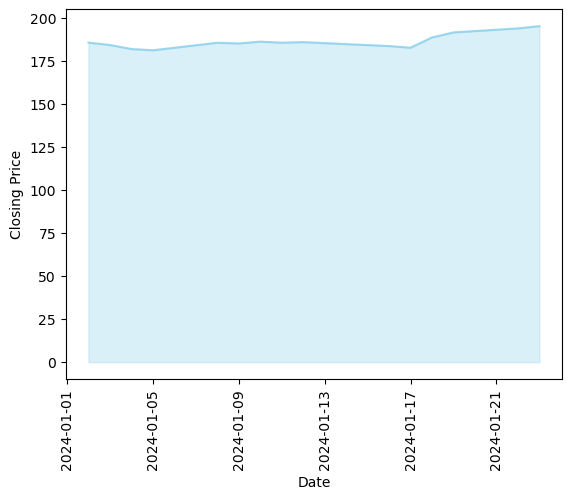

In [36]:
import matplotlib.pyplot as plt
plt.fill_between(df2.Date,df2.Close, color="skyblue",alpha=0.3)
plt.plot(df2.Date,df2.Close,color="skyblue",alpha = 0.8)
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Closing Price")

In [37]:
import matplotlib.pyplot as plt 

def price_plot(symbol):
    df = pd.DataFrame(data[symbol].Close)
    df["Date"] = df.index
    plt.fill_between(df.Date,df.Close, color="skyblue",alpha=0.3)
    plt.plot(df.Date,df.Close,color="skyblue",alpha = 0.8)
    plt.xticks(rotation=90)
    plt.title(symbol, fontweight="bold")
    plt.xlabel("Date",fontweight="bold")
    plt.ylabel("Closing Price",fontweight="bold")
    return plt.show()

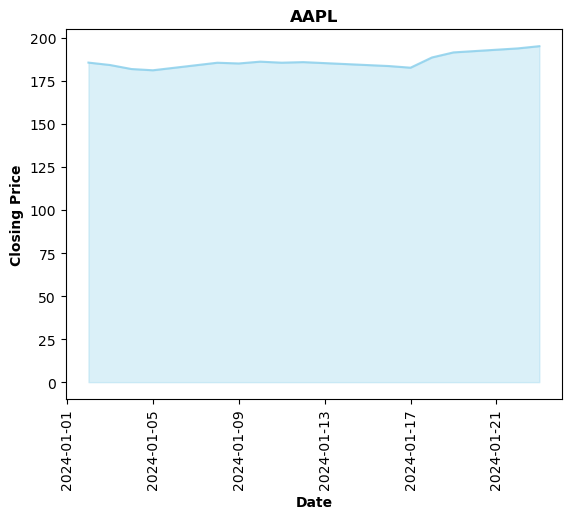

In [38]:
price_plot("AAPL")

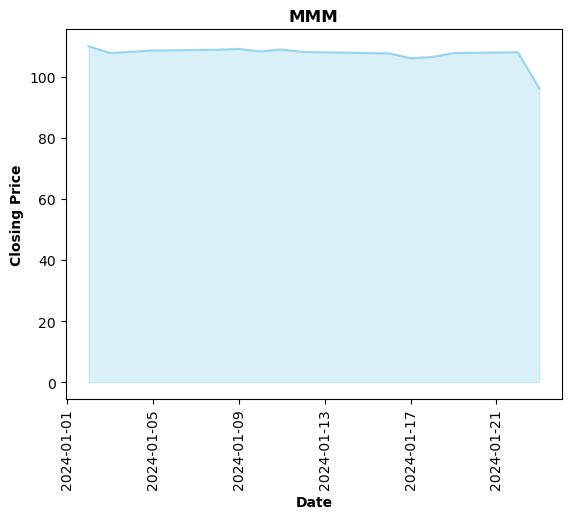

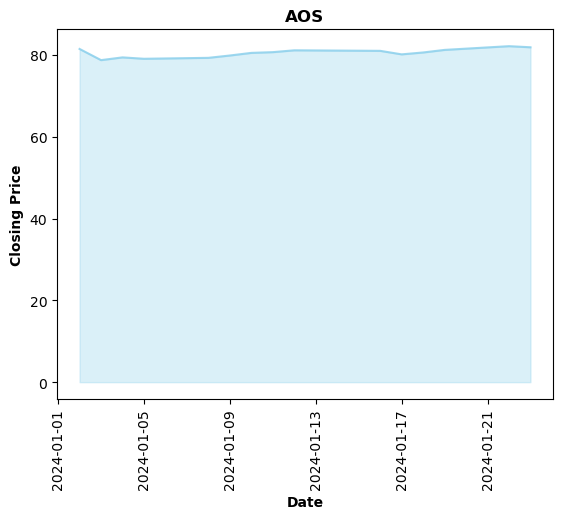

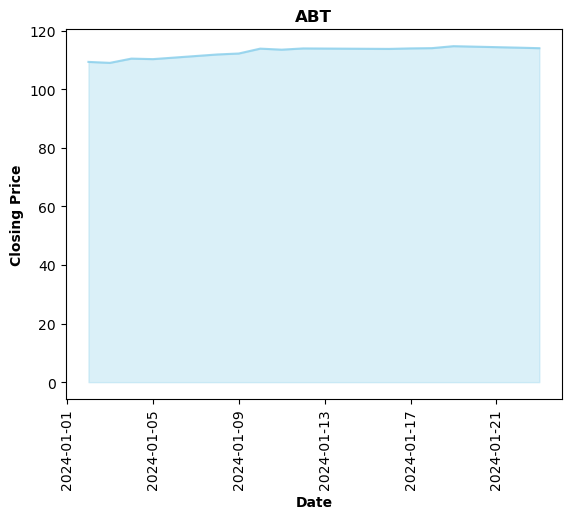

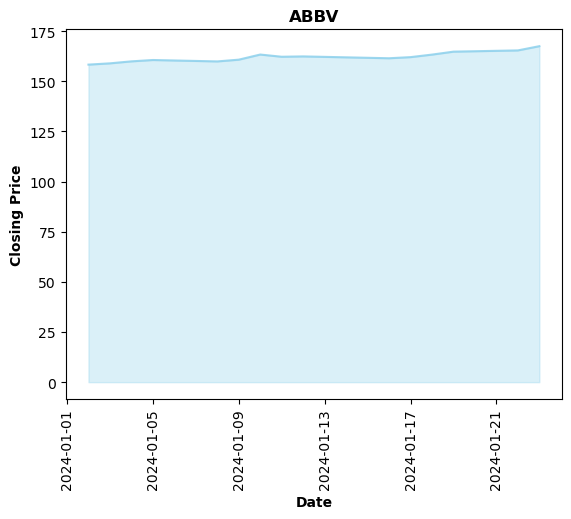

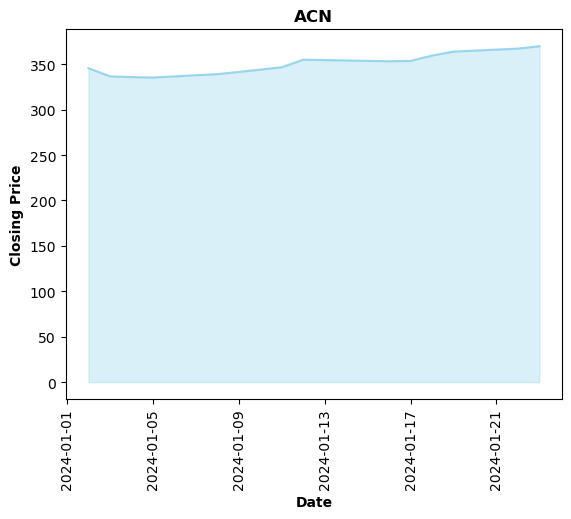

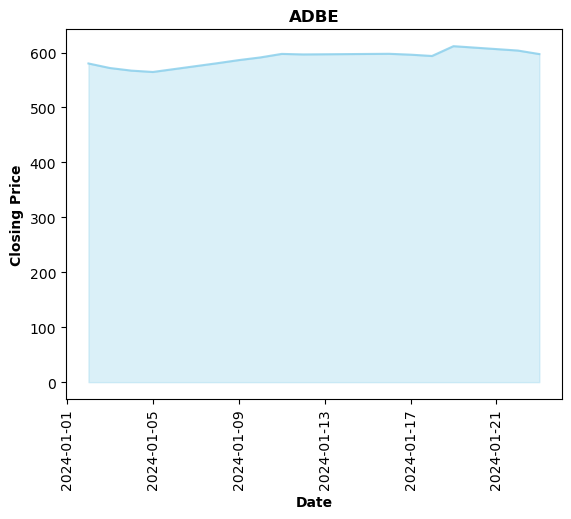

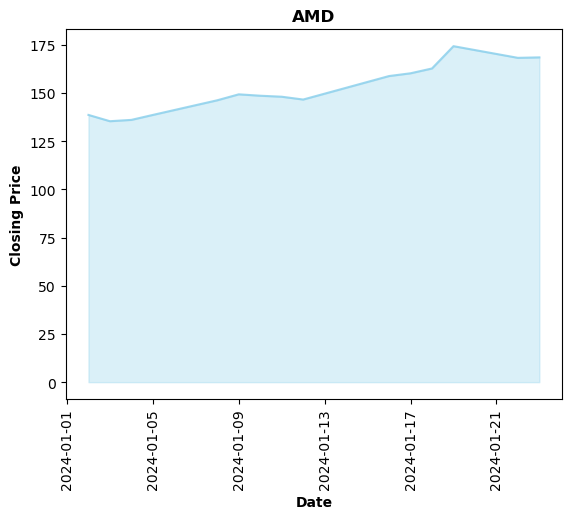

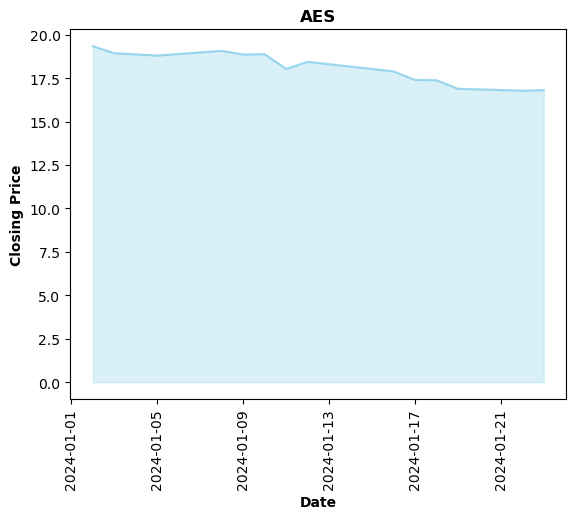

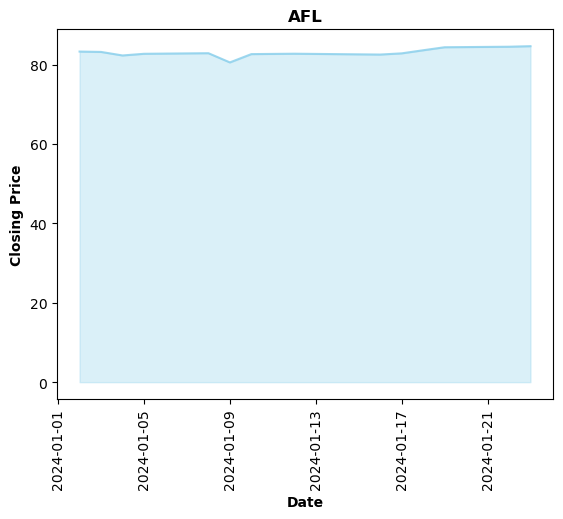

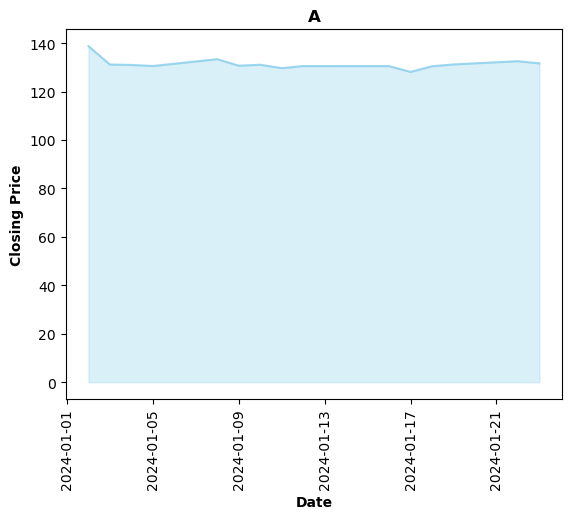

In [32]:
for i in list(df.Symbol)[:10]:
    price_plot(i)